In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy import interpolate
from shapely.geometry import LineString
from astropy.table import Table, unique
import numpy as np
%run Crossmatch.ipynb
%run Utility.ipynb

In [2]:
# Measures the magnitude offset due to the distance of the source with respect to us
# dist -- The distance to the object

dist = 150
DM = 5 * np.log10(dist) - 5

# Mass column from the BT-Settl models

bt_mass = np.array([0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])

# I magnitudes from the BT-Settl models with the magnitude offset applied

bt_I = np.array([14.291, 12.655, 11.737, 10.403, 9.648, 9.158, 8.800, 8.519, 8.462, 8.391, 8.270, 8.105, 8.209, 7.183, 6.466, 5.937, 5.533, 5.211, 4.916, 4.646, 4.417, 4.212, 4.016, 3.838, 3.669, 3.495])
bt_I = bt_I + DM

# J magnitudes from the BT-Settl models with the magnitude offset applied

bt_J = np.array([10.334, 9.488, 8.972, 8.020, 7.409, 6.976, 6.654, 6.409, 6.358, 6.297, 6.190, 6.061, 6.256, 5.516, 5.006, 4.636, 4.336, 4.098, 3.868, 3.658, 3.479, 3.315, 3.156, 3.012, 2.873, 2.730])
bt_J = bt_J + DM

# K magnitudes from the BT-Settl models with the magnitude offset applied

bt_K = np.array([9.381, 8.662, 8.173, 7.250, 6.653, 6.228, 5.913, 5.673, 5.621, 5.559, 5.452, 5.319, 5.510, 4.723, 4.155, 3.739, 3.427, 3.196, 2.987, 2.815, 2.677, 2.552, 2.430, 2.319, 2.213, 2.099])
bt_K = bt_K + DM

# I - J color from the BT-Settl models

bt_color_I_J = bt_I - bt_J

# I - K color from the BT-Settl models

bt_color_I_K = bt_I - bt_K

# Mass column from the BT-Settl models for the H-Alpha parameter space

mass_h_alpha = np.array([0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])

# H-Alpha magnitudes from the BT-Settl models with the magnitude offset applied

bt_h_alpha = np.array([16.967, 15.394, 14.369, 12.817, 11.957, 11.428, 11.050, 10.747, 10.686, 10.609, 10.479, 10.289, 10.326, 9.012, 8.026, 7.227, 6.639, 6.141, 5.693, 5.291, 4.973, 4.707, 4.472, 4.268, 4.078, 3.887])
bt_h_alpha = bt_h_alpha + DM

# The I - H-Alpha color of the above catalog

bt_I_h_alpha = bt_I - bt_h_alpha

# Mass column from the AMES-Dusty models

ames_mass = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.11, 0.13, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.57, 0.6, 0.62, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.2, 1.3, 1.4])

# I magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_I = np.array([21.873, 19.972, 18.007, 16.633, 15.764, 15.106, 14.594, 14.079, 13.635, 13.237, 12.909, 12.427, 11.898, 11.219, 10.237, 9.510, 8.960, 8.742, 8.505, 8.467, 8.185, 8.333, 8.190, 7.767, 7.945, 7.734, 7.546, 7.331, 7.132, 6.765, 6.444, 6.183, 5.968, 5.786, 5.618, 5.407, 5.324, 5.277, 5.074, 4.971, 4.855, 4.751, 4.671, 4.543, 4.460, 4.361, 4.201, 4.110, 4.040, 3.885, 3.731])
ames_I = ames_I + DM
ames_I = ames_I[ames_mass < 0.01]

# J magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_J = np.array([18.000, 15.728, 14.030, 13.034, 12.371, 11.794, 11.336, 10.974, 10.673, 10.404, 10.189, 9.874, 9.475, 8.965, 8.160, 7.584, 7.069, 6.893, 6.686, 6.654, 6.353, 6.544, 6.420, 5.974, 6.268, 6.081, 5.916, 5.720, 5.544, 5.226, 4.946, 4.716, 4.529, 4.370, 4.224, 4.040, 3.968, 3.930, 3.762, 3.679, 3.588, 3.509, 3.452, 3.346, 3.288, 3.211, 3.104, 3.057, 3.018, 2.910, 2.790])
ames_J = ames_J + DM
ames_J = ames_J[ames_mass < 0.01]

# K magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_K = np.array([18.861, 15.359, 13.282, 12.287, 11.597, 11.013, 10.551, 10.204, 9.920, 9.666, 9.462, 9.133, 8.752, 8.255, 7.467, 6.873, 6.368, 6.193, 5.989, 5.958, 5.663, 5.849, 5.723, 5.285, 5.564, 5.373, 5.204, 5.000, 4.814, 4.470, 4.164, 3.913, 3.710, 3.538, 3.381, 3.185, 3.108, 3.067, 2.888, 2.799, 2.705, 2.624, 2.565, 2.463, 2.410, 2.338, 2.249, 2.212, 2.178, 2.091, 1.998])
ames_K = ames_K + DM
ames_K = ames_K[ames_mass < 0.01]

# Only retain the array elements pertaining to masses below 0.01 Solar-masses

ames_mass = ames_mass[ames_mass < 0.01]

# I - J color from the AMES-Dusty models

ames_color_I_J = ames_I - ames_J

# I - K color from the AMES-Dusty models

ames_color_I_K = ames_I - ames_K

# Interpolates the BT-Settl model mass values with its respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

color_model_bt_I_J = interpolate.interp1d(bt_mass, bt_color_I_J, kind = 'linear')
color_model_bt_I_K = interpolate.interp1d(bt_mass, bt_color_I_K, kind = 'linear')
mag_model_bt = interpolate.interp1d(bt_mass, bt_I, kind = 'linear')

# Interpolates the AMES-Dusty model mass values with its respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

color_model_ames_I_J = interpolate.interp1d(ames_mass, ames_color_I_J, kind = 'linear')
color_model_ames_I_K = interpolate.interp1d(ames_mass, ames_color_I_K, kind = 'linear')
mag_model_ames = interpolate.interp1d(ames_mass, ames_I, kind = 'linear')

# Creates a continuous array connecting both models
# This is used to build an interpolation at the ends of both models

full_mass = np.hstack((ames_mass, bt_mass))
full_color_I_J = np.hstack((ames_color_I_J, bt_color_I_J))
full_color_I_K = np.hstack((ames_color_I_K, bt_color_I_K))
full_mag = np.hstack((ames_I, bt_I))

# Interpolates the mass values of both models with the respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

full_color_interp_I_J = interpolate.interp1d(full_mass, full_color_I_J)
full_color_interp_I_K = interpolate.interp1d(full_mass, full_color_I_K)
full_mag_interp = interpolate.interp1d(full_mass, full_mag)

# The mass values to be highlighted by the BT-Settl interpolation on the diagrams

m = np.array([0.01, 0.1, 0.2, 0.5, 1])

# The mass values to be highlighted by the AMES-Dusty interpolation on the diagrams

n = np.array([0.0005, 0.001, 0.005, 0.01, 0.1, 0.2, 0.5, 1])

# The minimum and maximum values present in the BT-Settl model mass array

min_mass_bt = np.amin(bt_mass)
max_mass_bt = np.amax(bt_mass)

# Only keep the values in the m-array which fall within the BT-Settl model mass array's limits

m = m[np.where(np.logical_and(m >= min_mass_bt, m <= max_mass_bt))]

# The minimum and maximum values present in the AMES-Dusty model mass array

min_mass_ames = np.amin(ames_mass)
max_mass_ames = np.amax(ames_mass)

# Only keep the values in the n-array which fall within the AMES-Dusty model mass array's limits

n = n[np.where(np.logical_and(n >= min_mass_ames, n <= max_mass_ames))]

# The variable to be used to plot the stitch between both models on the figures (starts from the lowest BT-Settl mass and ends on the highest AMES-Dusty mass)

xnew = np.linspace(min_mass_bt, max_mass_ames)

In [3]:
VHS = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat') # VHSDR6 sources

cat_c_t = ascii.read('/home/yobd/Documents/Photometry_Output/Full_Catalog_ZP_CT_Aper_PSF.dat') # SUBARU Catalog with color-term and zero-point correction

# The I - J color of the SUBARU catalog

color_filter_I_J = np.array(cat_c_t['I_MAG_SUBARU'] - cat_c_t['jAperMag3'])

# The I-band of the SUBARU catalog

mag_filter = np.array(cat_c_t['I_MAG_SUBARU'])

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

mag_filter = mag_filter[color_filter_I_J < 999]

color_filter_I_J = color_filter_I_J[color_filter_I_J < 999]

h_alpha = ascii.read('/home/yobd/Documents/Photometry_Output/N-A-L656_Full_Catalog_Aper_PSF.dat') # SUBARU H-Alpha soure catalog

# Removes the entries with bad flags, high excentricites and null flux values

h_alpha.remove_rows([h_alpha['ELLIPTICITY'] >= 0.5])

h_alpha.remove_rows([h_alpha['FLAGS'] != 0])

h_alpha.remove_rows([h_alpha['FLUX_PSF'] == 0])

h_alpha['H_ALPHA'] = - 2.5 * np.log10(h_alpha['FLUX_PSF'] / 180)

# Cross-match of the SUBARU-VHS catalog with the SUBARU H-Alpha catalog

cross_match_h_alpha = cross_match(h_alpha, 'ra', 'dec', cat_c_t, 'ra', 'dec', 1, sep = True)

cross_match_h_alpha = reset_main_catalog_columns(h_alpha, cross_match_h_alpha)

cross_match_h_alpha.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
cross_match_h_alpha = unique(cross_match_h_alpha, keys = ['ra_2', 'dec_2'], keep = 'first', silent = True)

# Converting the SUBARU H-Alpha catalog flux values into magnitude values

h_alpha['H_ALPHA'] = - 2.5 * np.log10(h_alpha['FLUX_PSF'] / 180)

color_c_t_h_alpha_I_J = np.array(cross_match_h_alpha['I_MAG_SUBARU'] - cross_match_h_alpha['jAperMag3'])

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

cross_match_h_alpha.remove_rows([color_c_t_h_alpha_I_J > 999])

mag_c_t_h_alpha = np.array(cross_match_h_alpha['I_MAG_SUBARU'])

h_alpha_mag = cross_match_h_alpha['H_ALPHA']

/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


[-0.5  -2.35]


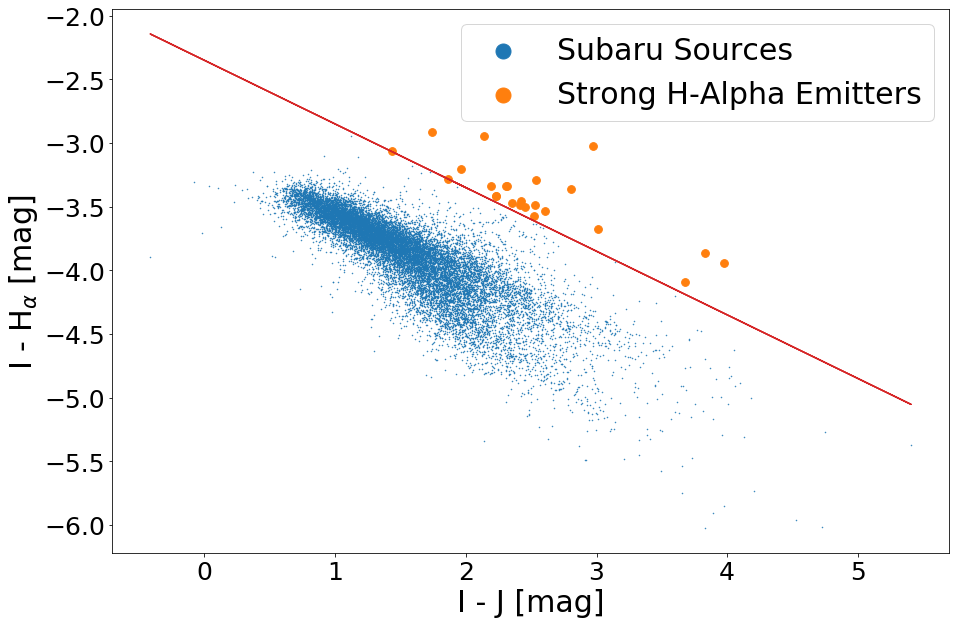

In [4]:
# This part of the code generates the extinction line in the color-magnitude parameter space
# It will be used to apply extinction to all sources which fall inside the selection space of the color-magnitude diagram (those to the right of the line)

%run ext_lambda.ipynb

# The reference wavelength for the DENIS I-band
i_lam = 7862.10 # Effective

# The reference wavelength for the H-Alpha filter
h_alpha_lam = 6566.81

# The reference wavelength for the VHS J-band
j_lam = 12481.00 # Effective

# The reference wavelength for the VHS K-band
k_lam = 21435.46

rv = 5

# The first coordinates correspond to a source with zero extinction and the second coordinates to a source with one mag of extinction

x_ext_0 = 0

y_ext_0 = 0

x_ext_1 = x_ext_0 + ext_lambda(j_lam, 1, rv) - ext_lambda(k_lam, 1, rv)

y_ext_1 = y_ext_0 + ext_lambda(i_lam, 1, rv) - ext_lambda(j_lam, 1, rv)

# The extinction line
a_ext, b_ext, c_ext = get_line_eq(x_ext_0, x_ext_1, y_ext_0, y_ext_1)

# The module of the above line corresponds to one unity of extinction
one_mag = np.sqrt( ( (x_ext_0 - x_ext_1) ** 2) + ( (y_ext_0 - y_ext_1) ** 2) )

# The slope of the extinction line
slope = - a_ext / b_ext

# The reddening vector for the I - H-Alpha vs. I - J plot

x_i_h_alpha_ext_1 = x_ext_0 + ext_lambda(i_lam, 1, rv) - ext_lambda(j_lam, 1, rv)

y_i_h_alpha_ext_1 = y_ext_0 + ext_lambda(i_lam, 1, rv) - ext_lambda(h_alpha_lam, 1, rv)

a_ext_h_alpha, b_ext_h_alpha, c_ext_h_alpha = get_line_eq(x_ext_0, x_i_h_alpha_ext_1, y_ext_0, y_i_h_alpha_ext_1)

# Creates a copy of the cross-match catalog between the SUBARU I-band and H-Alpha catalogs
# This will be used later for the second method of extinction estimation for the SUBARU sources
cross_match_c_t_h_alpha = Table.copy(cross_match_h_alpha)

# The I - J color of the sources
color_c_t_h_alpha_I_J = np.array(cross_match_c_t_h_alpha['I_MAG_SUBARU'] - cross_match_c_t_h_alpha['jAperMag3'])

# Dictionary of the zero-point of each detector (taken from RunPhotometryCalibrationIndividually.ipynb)
zp_dict = {'Chihiro': 26.564160194781675,
          'Clarisse': 26.634278146664666,
          'Fio': 26.620217643455472,
          'Kiki': 26.561495786478563,
          'Nausicaa': 26.56256327037939,
          'Ponyo': 26.654206436906197,
          'San': 27.03546513123152,
          'Satsuki': 26.621470259458757,
          'Sheeta': 26.661599362138485,
          'Sophie': 26.611817355289293}

# Applies the zero-point of each detector to the H-Alpha column
i = 0

while i < len(cross_match_c_t_h_alpha):
    cross_match_c_t_h_alpha['H_ALPHA'][i] = cross_match_c_t_h_alpha['H_ALPHA'][i] + zp_dict[cross_match_c_t_h_alpha['DETECTOR'][i]]
    i += 1

# The I - H-Alpha color of the sources
color_c_t_h_alpha_I_H_alpha = np.array(cross_match_c_t_h_alpha['I_MAG_SUBARU'] - cross_match_c_t_h_alpha['H_ALPHA'])

x = np.array([0.7, 2])

y = np.array([-2.7, - 3.35])

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
h_alpha_selec = (color_c_t_h_alpha_I_H_alpha - p(color_c_t_h_alpha_I_J) >= 0)

# The color of sources with bright H-Alpha emission
strong_h_alpha_color_I_J = color_c_t_h_alpha_I_J[h_alpha_selec]

# Their respective I - H-Alpha values
strong_h_alpha = color_c_t_h_alpha_I_H_alpha[h_alpha_selec]

# Creates a copy of the catalog with sources which pass I vs. I - J selection criteria and which have an H-Alpha counterpart
bright_h_alpha = Table.copy(cross_match_c_t_h_alpha)

# Removes the entries of sources below a given limit, keeping only sources with strong H-Alpha emission
bright_h_alpha = bright_h_alpha[h_alpha_selec]

# Writes the sources from the SUBARU I-band catalog with VHS J-band which have strong H-Alpha emission
ascii.write(bright_h_alpha, '/home/yobd/Documents/Selection/H_Alpha_Bright_Sources_2.dat', format = 'csv')

plt.rc('xtick',labelsize = 25)
plt.rc('ytick',labelsize = 25)

plt.figure(1, figsize = (15, 10))
plt.scatter(color_c_t_h_alpha_I_J, color_c_t_h_alpha_I_H_alpha, marker = '.', s = 1, label = 'Subaru Sources', color = 'C0')
plt.scatter(strong_h_alpha_color_I_J, strong_h_alpha, marker = '.', s = 240, label = 'Strong H-Alpha Emitters', color = 'C1')
plt.plot(color_c_t_h_alpha_I_J, p(color_c_t_h_alpha_I_J), "tab:red", linestyle = '-')
plt.arrow(4, -0.5, x_ext_0 - x_i_h_alpha_ext_1, y_ext_0 - y_i_h_alpha_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I - ' + r'H$_{\alpha}$' + ' [mag]', fontsize = 30)
lgnd = plt.legend(fontsize = 30, loc = 1)
lgnd.legendHandles[0]._sizes = [900]
lgnd.legendHandles[1]._sizes = [900]
plt.show()

3


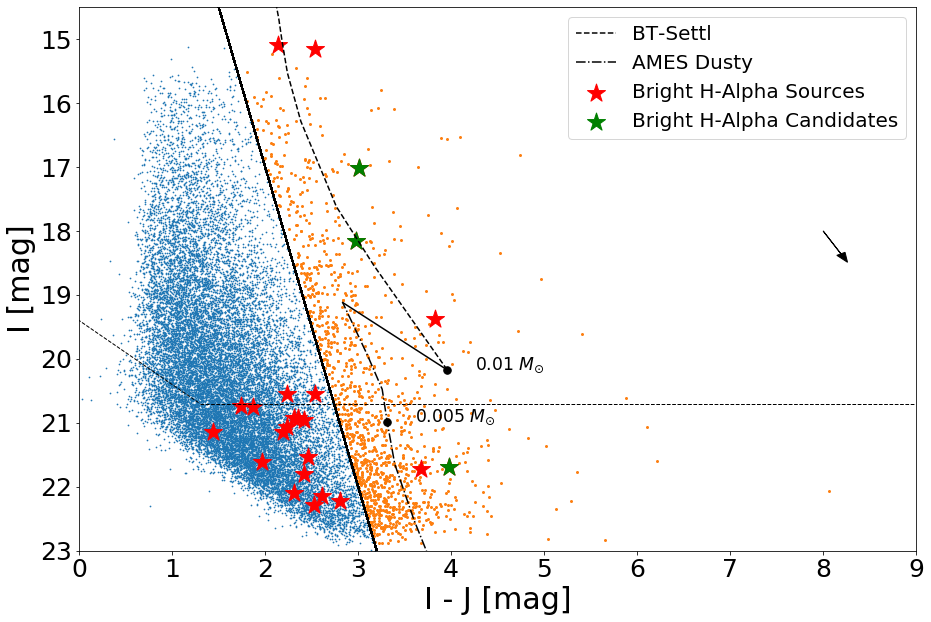

In [5]:
## THIS CELL PLOTS THE H-ALPHA SELECTED SOURCES ON THE I VS. I-J CMD ##

cross_match_c_t_h_alpha = Table.copy(cross_match_h_alpha)

brightest_member_color_I_J = 1
brightest_member = 15
faintest_color_I_J = 1.2
faintest_mag = 16

# Coordinates of the selection line to be used later when plotting

line_x = [brightest_member_color_I_J, faintest_color_I_J]
line_y = [brightest_member, faintest_mag]

# The function returns the parameter values to describe a line connecting the coordinates above
a_line, b_line, c_line = get_line_eq(brightest_member_color_I_J, faintest_color_I_J, brightest_member, faintest_mag)

# The region of the parameter space pertaining to redder, younger SUBARU I-band sources than those limited by the line described above
in_box = (a_line * (color_filter_I_J) + b_line * mag_filter + c_line <= -0.6) #& (mag_filter <= faintest_mag)

plt.rc('xtick',labelsize = 25)
plt.rc('ytick',labelsize = 25)

# The H-Alpha selected sources inside the CMD-selection region
h_alpha_candidates = cross_match_c_t_h_alpha[h_alpha_selec]

# The list of candidates for follow-up spectroscopy
candidates = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Total_selection.dat')

# This creates a list of H-Alpha selected sources which are present in the list of candidate sources
alpha_in_candidates = cross_match(h_alpha_candidates, 'ra', 'dec', candidates, 'ra', 'dec', 1, sep = True)

alpha_in_candidates = reset_main_catalog_columns(h_alpha_candidates, alpha_in_candidates)

# The completeness limits of the Subaru I-band catalog
lim_mag_l_x = - 10, 20.7 - 19.4
lim_mag_l_y = 9.4, 20.7
lim_mag_r_x = 20.7 - 19.4, 10
lim_mag_r_y = 20.7, 20.7

plt.figure(1, figsize = (15, 10))
plt.scatter(color_filter_I_J, mag_filter, marker = '.', s = 2)
plt.scatter(color_filter_I_J[in_box], mag_filter[in_box], marker = '.', s = 15)
plt.scatter(h_alpha_candidates['I_MAG_SUBARU'] - h_alpha_candidates['jAperMag3'], h_alpha_candidates['I_MAG_SUBARU'], color = 'r', marker = '*', label = 'Bright H-Alpha Sources', s = 360)
plt.scatter(alpha_in_candidates['I_MAG_SUBARU'] - alpha_in_candidates['jAperMag3'], alpha_in_candidates['I_MAG_SUBARU'], color = 'g', marker = '*', label = 'Bright H-Alpha Candidates', s = 360)
plt.plot(lim_mag_l_x, lim_mag_l_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(lim_mag_r_x, lim_mag_r_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(color_filter_I_J, (-0.6 - c_line - a_line * color_filter_I_J) / b_line, color = 'k')
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES Dusty', color = 'k', linestyle = '-.')
plt.plot(full_color_interp_I_J(xnew), full_mag_interp(xnew), color = 'k')
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 15, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.3, mag_model_bt(m1), str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 15, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.3, mag_model_ames(n1), str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
plt.arrow(8, 18, x_ext_1 - x_ext_0, y_ext_1 - y_ext_0, head_width = 0.1, color = 'k', label = 'Extinction')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
plt.xlim(0, 9)
plt.ylim(23, 14.5)
plt.legend(fontsize = 20, loc = 1, markerscale = 1)
plt.show()

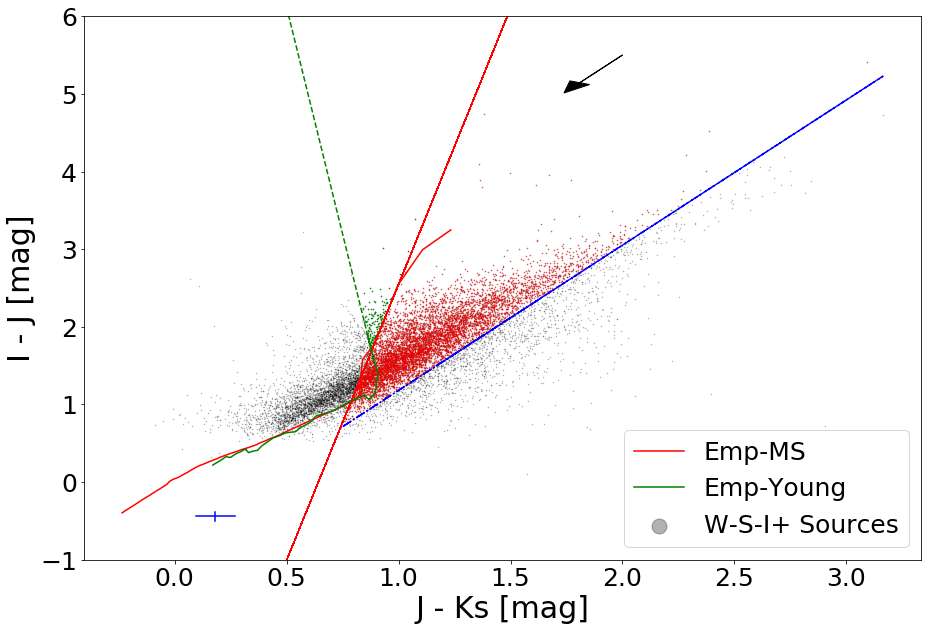

Sources approximated to the main-sequence: 6847
Sources approximated to the young colours: 143


In [6]:
from scipy.optimize import fsolve

# The empirical colors from Pecault et al. (2013)

emp_colors = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/Emp_Colours_MS.dat')

# The empirical colors for young stars from Pecault et al. (2013)

emp_colors_young = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/Emp_Colours_Young.dat')

# In order to obtain the J - Ks empirical colors we must subtract these two colors

emp_x = emp_colors['V-Ks'] - emp_colors['V-J']

# In order to obtain the I - J empirical colors we must subtract these two colors

emp_y = emp_colors['V-J'] - emp_colors['V-Ic']

# In order to obtain the I - Ks empirical colors we must subtract these two colors

emp_y_I_K = emp_colors['V-Ks'] - emp_colors['V-Ic']

# The first coordinates correspond to a source with zero extinction and the second coordinates to a source with one mag of extinction

x_ext_0 = emp_x[56]

y_ext_0 = emp_y[56]

x_ext_1 = x_ext_0 + ext_lambda(j_lam, 1, rv) - ext_lambda(k_lam, 1, rv)

y_ext_1 = y_ext_0 + ext_lambda(i_lam, 1, rv) - ext_lambda(j_lam, 1, rv)

# The extinction line which passes through the early types

a_ext, b_ext, c_ext = get_line_eq(x_ext_0, x_ext_1, y_ext_0, y_ext_1)

# The line between the two last points of the latest types

a, b, c = get_line_eq(emp_x[len(emp_x) - 2], emp_x[len(emp_x) - 1], emp_y[len(emp_y) - 2], emp_y[len(emp_y) - 1])

# The line that passes through the earliest types

a_2, b_2, c_2 = get_line_eq(emp_x[39], emp_x[40], emp_y[39], emp_y[40])

# The line that passes through the transition segment of the main-sequence empirical models

a_3, b_3, c_3 = get_line_eq(emp_x[61], emp_x[62], emp_y[61], emp_y[62])

# In order to obtain the J - Ks empirical colors we must subtract these two colors

emp_x_young = emp_colors_young['J-H'] + emp_colors_young['H-Ks']

# In order to obtain the I - J empirical colors we must subtract these two colors

emp_y_young = emp_colors_young['V-Ks'] - emp_colors_young['V-Ic'] - emp_colors_young['H-Ks'] - emp_colors_young['J-H']

# In order to obtain the I - J empirical colors we must subtract these two colors

emp_y_young_I_K = emp_colors_young['V-Ks'] - emp_colors_young['V-Ic']

# The line between the two last points of the vector created above

a_young, b_young, c_young = get_line_eq(emp_x_young[len(emp_x_young) - 6], emp_x_young[len(emp_x_young) - 5], emp_y_young[len(emp_y_young) - 6], emp_y_young[len(emp_y_young) - 5])

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

cross_match_c_t_h_alpha.remove_rows([cross_match_c_t_h_alpha['ksAperMag3'] < - 100])

# The I - J color of the sources

color_c_t_h_alpha_I_J = np.array(cross_match_c_t_h_alpha['I_MAG_SUBARU'] - cross_match_c_t_h_alpha['jAperMag3'])

# The I - Ks color of the sources

color_c_t_h_alpha_I_K = np.array(cross_match_c_t_h_alpha['I_MAG_SUBARU'] - cross_match_c_t_h_alpha['ksAperMag3'])

# The J - Ks color of the sources

color_c_t_h_alpha_J_K = np.array(cross_match_c_t_h_alpha['jAperMag3'] - cross_match_c_t_h_alpha['ksAperMag3'])

# The region of the parameter space pertaining to redder, main-sequence SUBARU I-band sources than those limited by the line described above

in_box = (a_3 * color_c_t_h_alpha_J_K + b_3 * color_c_t_h_alpha_I_J + c_3 <= 0) & (a_ext * color_c_t_h_alpha_J_K + b_ext * color_c_t_h_alpha_I_J + c_ext >= -0.05)

# The region of the parameter space pertaining to redder, younger SUBARU I-band sources than those limited by the line described above

in_box_young = (a_3 * color_c_t_h_alpha_J_K + b_3 * color_c_t_h_alpha_I_J + c_3 >= 0) & (a_young * color_c_t_h_alpha_J_K + b_young * color_c_t_h_alpha_I_J + c_young <= 0)

# Initializes the array where the extinction values of each source inside the selected paramater space will be saved

extinctions = np.zeros(len(color_c_t_h_alpha_J_K[in_box]), dtype = np.float64)

extinctions_i = np.zeros(len(color_c_t_h_alpha_J_K[in_box]), dtype = np.float64)

extinctions_j = np.zeros(len(color_c_t_h_alpha_J_K[in_box]), dtype = np.float64)

extinctions_k = np.zeros(len(color_c_t_h_alpha_J_K[in_box]), dtype = np.float64)

# Initializes the counter for the WHILE cycle

i = 0

# During the WHILE cycle, the extinction for each source inside the selected parameter space will be estimated

while i < len(color_c_t_h_alpha_J_K[in_box]):
    
    # y[0] is the reddening extinction line which passes on the item's coordinates
    # y[1] is the model line
    # The function will calculate the interception of these lines (this interception will be the point the item's coords should be if it had not been reddened)
    
    def f(x):
        y = np.zeros(2)
        y[0] = a_ext * (x[0] - color_c_t_h_alpha_J_K[in_box][i]) + b_ext * (x[1] - color_c_t_h_alpha_I_J[in_box][i]) + c_ext
        y[1] = a_3 * x[0] + b_3 * x[1] + c_3
        return y
    
    # x0 is needed just as an input for the FSOLVE function
    
    x0 = np.array([0, 0])
    
    # Retrieves two values:
    # solution[0] - The xx coordinate of the interception point
    # solution[1] - The yy coordinate of the interception point
    
    solution = fsolve(f, x0)
    
    # The extinction magnitude of the current item (in the visible)
    
    av_mag = np.sqrt( ( (solution[0] - color_c_t_h_alpha_J_K[in_box][i]) ** 2) + ( (solution[1] - color_c_t_h_alpha_I_J[in_box][i]) ** 2) ) / one_mag
    
    # The bolometric extinction magnitude of the current item
    
    extinctions[i] = ext_lambda(h_alpha_lam, av_mag, rv)
    
    extinctions_i[i] = ext_lambda(i_lam, av_mag, rv)
    
    extinctions_j[i] = ext_lambda(j_lam, av_mag, rv)
    
    extinctions_k[i] = ext_lambda(k_lam, av_mag, rv)
    
    # Iteration of the cycle
    
    i = i + 1

# Initializes the array where the extinction values of each source inside the selected paramater space will be saved

extinctions_young = np.zeros(len(color_c_t_h_alpha_J_K[in_box_young]), dtype = np.float64)

extinctions_i_young = np.zeros(len(color_c_t_h_alpha_J_K[in_box_young]), dtype = np.float64)

extinctions_j_young = np.zeros(len(color_c_t_h_alpha_J_K[in_box_young]), dtype = np.float64)

extinctions_k_young = np.zeros(len(color_c_t_h_alpha_J_K[in_box_young]), dtype = np.float64)

# Initializes the counter for the WHILE cycle

i = 0

# During the WHILE cycle, the extinction for each source inside the selected parameter space will be estimated

while i < len(color_c_t_h_alpha_J_K[in_box_young]):
    
    # y[0] is the reddening extinction line which passes on the item's coordinates
    # y[1] is the model line
    # The function will calculate the interception of these lines (this interception will be the point the item's coords should be if it had not been reddened)
    
    def f(x):
        y = np.zeros(2)
        y[0] = a_ext * (x[0] - color_c_t_h_alpha_J_K[in_box_young][i]) + b_ext * (x[1] - color_c_t_h_alpha_I_J[in_box_young][i]) + c_ext
        y[1] = a_young * x[0] + b_young * x[1] + c_young
        return y
    
    # x0 is needed just as an input for the FSOLVE function
    
    x0 = np.array([0, 0])
    
    # Retrieves two values:
    # solution[0] - The xx coordinate of the interception point
    # solution[1] - The yy coordinate of the interception point
    
    solution = fsolve(f, x0)
    
    # The extinction magnitude of the current item (in the visible)
    
    av_mag = np.sqrt( ( (solution[0] - color_c_t_h_alpha_J_K[in_box_young][i]) ** 2) + ( (solution[1] - color_c_t_h_alpha_I_J[in_box_young][i]) ** 2) ) / one_mag
    
    # The bolometric extinction magnitude of the current item
    
    extinctions_young[i] = ext_lambda(h_alpha_lam, av_mag, rv)
    
    extinctions_i_young[i] = ext_lambda(i_lam, av_mag, rv)
    
    extinctions_j_young[i] = ext_lambda(j_lam, av_mag, rv)
    
    extinctions_k_young[i] = ext_lambda(k_lam, av_mag, rv)
    
    # Iteration of the cycle
    
    i = i + 1

# Initializes the column with the updated H-Alpha magnitude values

cross_match_c_t_h_alpha['H_ALPHA_NEW'] = cross_match_c_t_h_alpha['H_ALPHA']

# Applies the vector of estimated extinction only to the entries in the catalog which fall under the selection criteria parameter space

cross_match_c_t_h_alpha['H_ALPHA_NEW'][in_box] = cross_match_c_t_h_alpha['H_ALPHA'][in_box] - extinctions

cross_match_c_t_h_alpha['H_ALPHA_NEW'][in_box_young] = cross_match_c_t_h_alpha['H_ALPHA'][in_box_young] - extinctions_young

cross_match_c_t_h_alpha['I_MAG_SUBARU_NEW'] = cross_match_c_t_h_alpha['I_MAG_SUBARU']

cross_match_c_t_h_alpha['I_MAG_SUBARU_NEW'][in_box] = cross_match_c_t_h_alpha['I_MAG_SUBARU'][in_box] - extinctions_i

cross_match_c_t_h_alpha['I_MAG_SUBARU_NEW'][in_box_young] = cross_match_c_t_h_alpha['I_MAG_SUBARU'][in_box_young] - extinctions_i_young

cross_match_c_t_h_alpha['jAperMag3_NEW'] = cross_match_c_t_h_alpha['jAperMag3']

cross_match_c_t_h_alpha['jAperMag3_NEW'][in_box] = cross_match_c_t_h_alpha['jAperMag3'][in_box] - extinctions_j

cross_match_c_t_h_alpha['jAperMag3_NEW'][in_box_young] = cross_match_c_t_h_alpha['jAperMag3'][in_box_young] - extinctions_j_young

cross_match_c_t_h_alpha['ksAperMag3_NEW'] = cross_match_c_t_h_alpha['ksAperMag3']

cross_match_c_t_h_alpha['ksAperMag3_NEW'][in_box] = cross_match_c_t_h_alpha['ksAperMag3'][in_box] - extinctions_k

cross_match_c_t_h_alpha['ksAperMag3_NEW'][in_box_young] = cross_match_c_t_h_alpha['ksAperMag3'][in_box_young] - extinctions_k_young

# Initializes and builds an extinction column for the catalog

cross_match_c_t_h_alpha['H_ALPHA_EXT'] = 0.0

cross_match_c_t_h_alpha['H_ALPHA_EXT'][in_box] = extinctions

cross_match_c_t_h_alpha['H_ALPHA_EXT'][in_box_young] = extinctions_young

cross_match_c_t_h_alpha['I_EXT'] = 0.0

cross_match_c_t_h_alpha['I_EXT'][in_box] = extinctions_i

cross_match_c_t_h_alpha['I_EXT'][in_box_young] = extinctions_i_young

cross_match_c_t_h_alpha['J_EXT'] = 0.0

cross_match_c_t_h_alpha['J_EXT'][in_box] = extinctions_j

cross_match_c_t_h_alpha['J_EXT'][in_box_young] = extinctions_j_young

cross_match_c_t_h_alpha['K_EXT'] = 0.0

cross_match_c_t_h_alpha['K_EXT'][in_box] = extinctions_k

cross_match_c_t_h_alpha['K_EXT'][in_box_young] = extinctions_k_young

# Errors for the plot
I_J_err = np.nanmean(cross_match_c_t_h_alpha['I_MAG_SUBARU_ERR'] + cross_match_c_t_h_alpha['jAperMag3Err'])

J_K_err = np.nanmean(cross_match_c_t_h_alpha['jAperMag3Err'] + cross_match_c_t_h_alpha['ksAperMag3Err'])

plt.rc('xtick',labelsize = 25)
plt.rc('ytick',labelsize = 25)

plt.figure(1, figsize = (15, 10))
plt.scatter(color_c_t_h_alpha_J_K, color_c_t_h_alpha_I_J, marker = '.', s = 1, color = 'k', label = 'W-S-I+ Sources', alpha = 0.3)
plt.scatter(color_c_t_h_alpha_J_K[in_box], color_c_t_h_alpha_I_J[in_box], marker = '.', s = 1, color = 'r', alpha = 0.5)
plt.scatter(color_c_t_h_alpha_J_K[in_box_young], color_c_t_h_alpha_I_J[in_box_young], marker = '.', s = 1, color = 'g')
color_c_t_h_alpha_J_K_early_type = np.copy(color_c_t_h_alpha_J_K[color_c_t_h_alpha_J_K > 1.2])
color_c_t_h_alpha_J_K_later_type = np.copy(color_c_t_h_alpha_J_K[color_c_t_h_alpha_J_K > 0.8])
color_c_t_h_alpha_J_K_ext_vector = np.copy(color_c_t_h_alpha_J_K[color_c_t_h_alpha_J_K > 0.74])
plt.plot(color_c_t_h_alpha_J_K_ext_vector, (-0.05 - c_ext - a_ext * color_c_t_h_alpha_J_K_ext_vector) / b_ext, color = 'b', linestyle = '-.')#, label = 'Emp-MS Early Type')
color_c_t_h_alpha_J_K_ms = np.copy(color_c_t_h_alpha_J_K)
plt.plot(color_c_t_h_alpha_J_K_ms, (- c_3 - a_3 * color_c_t_h_alpha_J_K_ms) / b_3, color = 'r', linewidth = 0.8)
emp_x_young_extension = np.copy(emp_x_young[emp_x_young < 0.9])
plt.plot(emp_x_young_extension, (- c_young - a_young * emp_x_young_extension) / b_young, color = 'g', linestyle = '--')
plt.plot(emp_x, emp_y, label = 'Emp-MS', color = 'r')
plt.plot(emp_x_young, emp_y_young, label = 'Emp-Young', color = 'g')
plt.arrow(2, 5.5, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.ylim(-1, 6)
x_err_bar_x = [plt.xlim()[0] + 0.5, plt.xlim()[0] + 0.5 + J_K_err]
x_err_bar_y = [plt.ylim()[0] + 0.5 + I_J_err / 2, plt.ylim()[0] + 0.5 + I_J_err / 2]
y_err_bar_x = [plt.xlim()[0] + 0.5 + J_K_err / 2, plt.xlim()[0] + 0.5 + J_K_err / 2]
y_err_bar_y = [plt.ylim()[0] + 0.5 + I_J_err, plt.ylim()[0] + 0.5]
plt.plot(x_err_bar_x, x_err_bar_y, color = 'b')
plt.plot(y_err_bar_x, y_err_bar_y, color = 'b')
plt.xlabel('J - Ks [mag]', fontsize = 30)
plt.ylabel('I - J [mag]', fontsize = 30)
plt.legend(fontsize = 25, loc = 4, markerscale = 30)
plt.show()

print("Sources approximated to the main-sequence:", len(color_c_t_h_alpha_J_K[in_box]))
print("Sources approximated to the young colours:", len(color_c_t_h_alpha_J_K[in_box_young]))

ascii.write(cross_match_c_t_h_alpha[cross_match_c_t_h_alpha['I_EXT'] != 0], '/home/yobd/Documents/WSI_extinction_estimated.dat', format = 'csv', overwrite = True)

(9441, 11544)


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


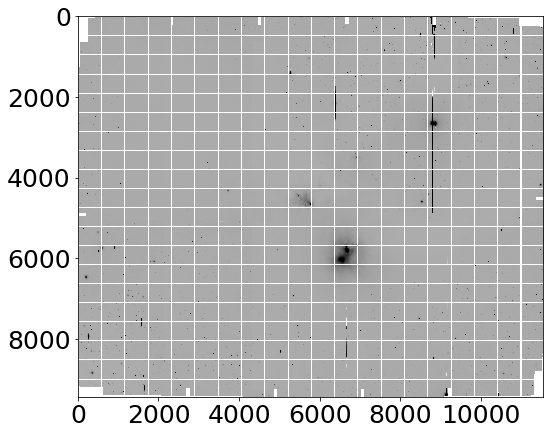

/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


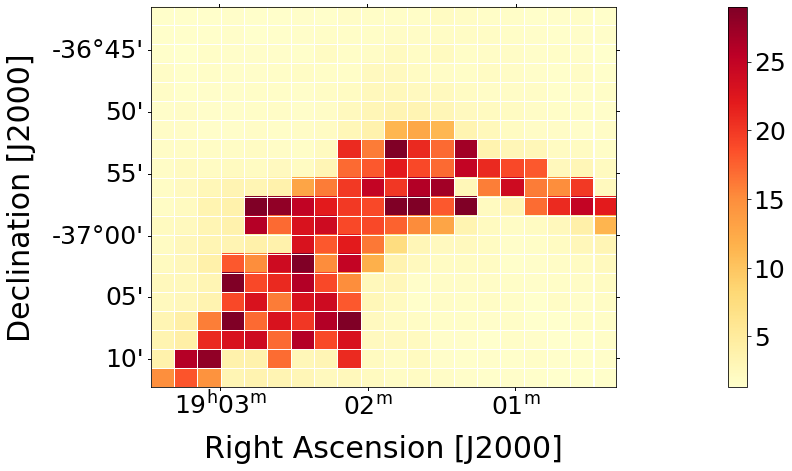

In [5]:
### CREATING THE EXTINCTION MAP FOR THE I-BAND AND SAVING IT TO A FITS FILE ###
import math
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS

# List of cutouts
cutouts = []

# Montage Mosaic
hdu = fits.open('/home/yobd/Documents/AstroAliSciObj/Montaged_Filters/W-S-I+_Montaged_Median/W-S-I+_Median_Montaged_Mosaic.fits')

# Variable for the header of the fits
head = hdu[0].header

# The WCS information of the fits file
wcs_head = WCS(head)

# Variable for the image of the fits
im = hdu[0].data

# The grids the map will be divided into
vertical_grids = 20
horizontal_grids = 20
grid_size = (math.ceil(im.shape[0] / vertical_grids), math.ceil(im.shape[1] / horizontal_grids))

# Divides the fits image into the set grid and plots it

i = 0
j = 0

while i < vertical_grids:
    while j < horizontal_grids:
        position = (grid_size[1] * j + grid_size[1] / 2, grid_size[0] * i + grid_size[0] / 2)
        cutouts.append(Cutout2D(im, position, grid_size, wcs = wcs_head, mode = 'trim'))
        j += 1
    j = 0
    i += 1

plt.figure(1, figsize = (20, 7))
plt.imshow(im, cmap = plt.cm.Greys, norm = LogNorm(vmin = 500, vmax = 10000))
for cutout in cutouts:
    cutout.plot_on_original(color = 'white')
plt.show()

from astropy.wcs.utils import pixel_to_skycoord
from astropy.io import ascii
%run Utility.ipynb

# The list of sources with estimated extinction values
ext_estimated = ascii.read('/home/yobd/Documents/WSI_extinction_estimated.dat')

# Creates a separate image the same size as the fits image with the average extinction of the sources in each cell setting the values of each grid cell
# For the case of a low number of sources, it sets as an unreasonably high number (99999) and for the case of being inside the cloud region it sets it as a random
# integer between 15 and 31 mags
i = 0
row = 0
column = 0

while i < len(cutouts):
    
    top_left = pixel_to_skycoord(0, cutouts[i].shape[0] - 1, cutouts[i].wcs)
    top_right = pixel_to_skycoord(cutouts[i].shape[1] - 1, cutouts[i].shape[0] - 1, cutouts[i].wcs)
    bottom_left = pixel_to_skycoord(0, 0, cutouts[i].wcs)
    bottom_right = pixel_to_skycoord(cutouts[i].shape[1] - 1, 0, cutouts[i].wcs)
    
    if top_left.frame.ra.degree > bottom_left.frame.ra.degree:
        ra_left = top_left.frame.ra.degree
    else:
        ra_left = bottom_left.frame.ra.degree
    
    if top_right.frame.ra.degree < bottom_right.frame.ra.degree:
        ra_right = top_right.frame.ra.degree
    else:
        ra_right = bottom_right.frame.ra.degree
    
    if bottom_left.frame.dec.degree < bottom_right.frame.dec.degree:
        dec_bottom = bottom_left.frame.dec.degree
    else:
        dec_bottom = bottom_right.frame.dec.degree
    
    if top_left.frame.dec.degree > top_right.frame.dec.degree:
        dec_top = top_left.frame.dec.degree
    else:
        dec_top = top_right.frame.dec.degree
    
    srcs = sources_in_region(ra_right, ra_left, dec_bottom, dec_top, ext_estimated, 'ra', 'dec')
    
    if len(srcs) < 10:
        
        center = pixel_to_skycoord(cutouts[i].center_cutout[0], cutouts[i].center_cutout[1], cutouts[i].wcs)
        
        ra_temp = center.frame.ra.degree
        dec_temp = center.frame.dec.degree
        
        if (ra_temp > 285.53 and ra_temp < 285.81 and dec_temp > - 37.17 and dec_temp < - 36.96) or (ra_temp < 285.58 and dec_temp > - 36.98 and dec_temp < - 36.87):
            cutouts[i].data[:, :] = np.random.randint(15, 31)
        else:
            cutouts[i].data[:, :] = 99999
    else:
        cutouts[i].data[:, :] = np.where(np.isnan(cutouts[i].data), cutouts[i].data, np.nanmean(srcs['I_EXT']))
    
    i += 1

# Performs the averaging for cells with low sources which were flagged with high extinction values (99999)
i = 0

while i < len(cutouts):
    if np.nanmean(cutouts[i].data) == 99999:
        avg_ext = []
        # Case for the top-left most grid cell
        if i == 0:
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i + (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids + 1)].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 1:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for a grid cell in the top most row:
        elif (i > 0) and (i < horizontal_grids - 1):
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i + (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            if np.nanmean(cutouts[i + (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids + 1)].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 2:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for the top-right most grid cell
        if i == (horizontal_grids - 1):
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i + (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 1:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for a grid cell in the left most column
        if (i % horizontal_grids == 0) and (i != horizontal_grids * vertical_grids - horizontal_grids):
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            if np.nanmean(cutouts[i + (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids + 1)].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            # Rejecting the case where only two of the grids near the left most edge have extinction estimation
            if len(avg_ext) > 2:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for the bottom-left most grid cell
        elif i == (horizontal_grids * vertical_grids - horizontal_grids):
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 1:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for the bottom-right most grid cell
        elif i == (horizontal_grids * vertical_grids - 1):
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids + 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 1:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for a grid cell in the right most column
        elif (i + 1) % horizontal_grids == 0:
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids + 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            if np.nanmean(cutouts[i + (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            # Rejecting the case where only two of the grids near the right most edge have extinction estimation
            if len(avg_ext) > 2:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for a grid cell in the bottom most row
        elif (i > horizontal_grids * vertical_grids - horizontal_grids) and (i < horizontal_grids * vertical_grids - 1):
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            if np.nanmean(cutouts[i - (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids + 1)].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 2:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for grids anywhere else on the map
        else:
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i - (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids + 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            if np.nanmean(cutouts[i + (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i + (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids + 1)].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 3:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        if sum(avg_ext) / len(avg_ext) > 10000:
            print(avg_ext)
            print(sum(avg_ext), len(avg_ext))
    i += 1
    if i == len(cutouts):
        j = 0
        while j < len(cutouts):
            if np.nanmean(cutouts[j].data) == 99999:
                print("There are still empty grids. Restarting...")
                i = 0
                j = len(cutouts)
            else:
                j += 1

# Redefines the fits image as the new extinction map
i = 0
while i < len(cutouts):
    ext = np.nanmean(cutouts[i].data)
    origin = cutouts[i].origin_original
    im[origin[1]:origin[1] + grid_size[0] + 1, origin[0]:origin[0] + grid_size[1] + 1] = ext
    i += 1

# Plots the extinction map
plt.figure(2, figsize = (20, 7))
ax = plt.subplot(projection = wcs_head)
c = ax.imshow(im, cmap = plt.cm.YlOrRd)
ax.set_xlabel('Right Ascension [J2000]', fontsize = 30)
ax.set_ylabel('Declination [J2000]', fontsize = 30)
plt.colorbar(c, ax = ax, pad = 0.1)
for cutout in cutouts:
    cutout.plot_on_original(color = 'white')
plt.show()

# Stores the extinction map into a new fits file
hduimfinal = fits.PrimaryHDU(data = im, header = head)
hduimfinal.writeto('/home/yobd/Documents/i_ext_map.fits', overwrite = True)

(9441, 11544)


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


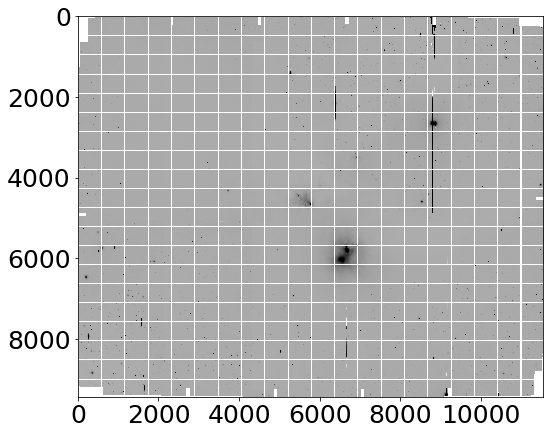

/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


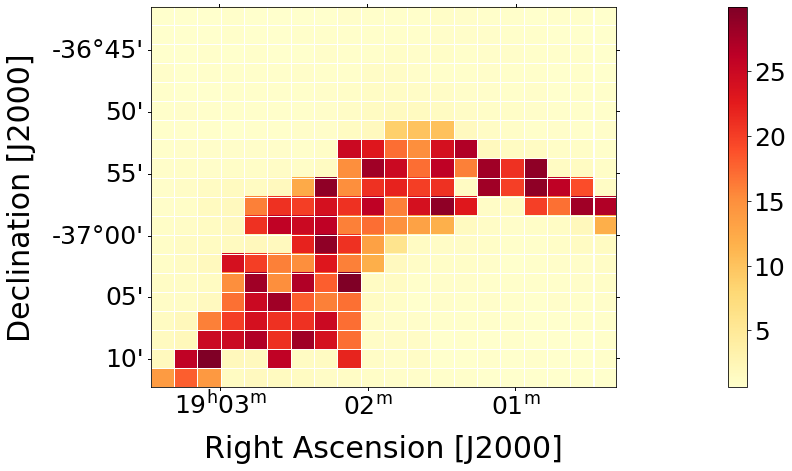

In [6]:
### CREATING THE EXTINCTION MAP FOR THE J-BAND AND SAVING IT TO A FITS FILE ###
import math
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS

# List of cutouts

cutouts = []

# Montage Mosaic
hdu = fits.open('/home/yobd/Documents/AstroAliSciObj/Montaged_Filters/W-S-I+_Montaged_Median/W-S-I+_Median_Montaged_Mosaic.fits')

# Variable for the header of the fits
head = hdu[0].header

# The WCS information of the fits file
wcs_head = WCS(head)

# Variable for the image of the fits
im = hdu[0].data

# The grids the map will be divided into
vertical_grids = 20
horizontal_grids = 20
grid_size = (math.ceil(im.shape[0] / vertical_grids), math.ceil(im.shape[1] / horizontal_grids))

i = 0
j = 0

while i < vertical_grids:
    while j < horizontal_grids:
        position = (grid_size[1] * j + grid_size[1] / 2, grid_size[0] * i + grid_size[0] / 2)
        cutouts.append(Cutout2D(im, position, grid_size, wcs = wcs_head, mode = 'trim'))
        j += 1
    j = 0
    i += 1

plt.figure(1, figsize = (20, 7))
plt.imshow(im, cmap = plt.cm.Greys, norm = LogNorm(vmin = 500, vmax = 10000))
for cutout in cutouts:
    cutout.plot_on_original(color = 'white')
plt.show()

from astropy.wcs.utils import pixel_to_skycoord
from astropy.io import ascii
%run Utility.ipynb

# The list of sources with estimated extinction values
ext_estimated = ascii.read('/home/yobd/Documents/WSI_extinction_estimated.dat')


# Creates a separate image the same size as the fits image with the average extinction of the sources in each cell setting the values of each grid cell
# For the case of a low number of sources, it sets as an unreasonably high number (99999) and for the case of being inside the cloud region it sets it as a random
# integer between 15 and 31 mags
i = 0

row = 0
column = 0

while i < len(cutouts):
    
    top_left = pixel_to_skycoord(0, cutouts[i].shape[0] - 1, cutouts[i].wcs)
    top_right = pixel_to_skycoord(cutouts[i].shape[1] - 1, cutouts[i].shape[0] - 1, cutouts[i].wcs)
    bottom_left = pixel_to_skycoord(0, 0, cutouts[i].wcs)
    bottom_right = pixel_to_skycoord(cutouts[i].shape[1] - 1, 0, cutouts[i].wcs)
    
    if top_left.frame.ra.degree > bottom_left.frame.ra.degree:
        ra_left = top_left.frame.ra.degree
    else:
        ra_left = bottom_left.frame.ra.degree
    
    if top_right.frame.ra.degree < bottom_right.frame.ra.degree:
        ra_right = top_right.frame.ra.degree
    else:
        ra_right = bottom_right.frame.ra.degree
    
    if bottom_left.frame.dec.degree < bottom_right.frame.dec.degree:
        dec_bottom = bottom_left.frame.dec.degree
    else:
        dec_bottom = bottom_right.frame.dec.degree
    
    if top_left.frame.dec.degree > top_right.frame.dec.degree:
        dec_top = top_left.frame.dec.degree
    else:
        dec_top = top_right.frame.dec.degree
    
    srcs = sources_in_region(ra_right, ra_left, dec_bottom, dec_top, ext_estimated, 'ra', 'dec')
    
    if len(srcs) < 10:
        
        center = pixel_to_skycoord(cutouts[i].center_cutout[0], cutouts[i].center_cutout[1], cutouts[i].wcs)
        
        ra_temp = center.frame.ra.degree
        dec_temp = center.frame.dec.degree
        
        if (ra_temp > 285.53 and ra_temp < 285.81 and dec_temp > - 37.17 and dec_temp < - 36.96) or (ra_temp < 285.58 and dec_temp > - 36.98 and dec_temp < - 36.87):
            cutouts[i].data[:, :] = np.random.randint(15, 31)
        else:
            cutouts[i].data[:, :] = 99999
    else:
        cutouts[i].data[:, :] = np.where(np.isnan(cutouts[i].data), cutouts[i].data, np.nanmean(srcs['J_EXT']))
    
    i += 1

# Performs the averaging for cells with low sources which were flagged with high extinction values (99999)
i = 0

while i < len(cutouts):
    if np.nanmean(cutouts[i].data) == 99999:
        avg_ext = []
        # Case for the top-left most grid cell
        if i == 0:
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i + (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids + 1)].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 1:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for a grid cell in the top most row:
        elif (i > 0) and (i < horizontal_grids - 1):
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i + (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            if np.nanmean(cutouts[i + (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids + 1)].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 2:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for the top-right most grid cell
        if i == (horizontal_grids - 1):
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i + (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 1:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for a grid cell in the left most column
        if (i % horizontal_grids == 0) and (i != horizontal_grids * vertical_grids - horizontal_grids):
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            if np.nanmean(cutouts[i + (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids + 1)].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            # Rejecting the case where only two of the grids near the left most edge have extinction estimation
            if len(avg_ext) > 2:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for the bottom-left most grid cell
        elif i == (horizontal_grids * vertical_grids - horizontal_grids):
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 1:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for the bottom-right most grid cell
        elif i == (horizontal_grids * vertical_grids - 1):
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids + 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 1:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for a grid cell in the right most column
        elif (i + 1) % horizontal_grids == 0:
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids + 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            if np.nanmean(cutouts[i + (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            # Rejecting the case where only two of the grids near the right most edge have extinction estimation
            if len(avg_ext) > 2:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for a grid cell in the bottom most row
        elif (i > horizontal_grids * vertical_grids - horizontal_grids) and (i < horizontal_grids * vertical_grids - 1):
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            if np.nanmean(cutouts[i - (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids + 1)].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 2:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        # Case for grids anywhere else on the map
        else:
            if np.nanmean(cutouts[i - 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - 1].data))
            if np.nanmean(cutouts[i + 1].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + 1].data))
            if np.nanmean(cutouts[i - (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i - (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - (horizontal_grids + 1)].data))
            if np.nanmean(cutouts[i - horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i - horizontal_grids].data))
            if np.nanmean(cutouts[i + horizontal_grids].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + horizontal_grids].data))
            if np.nanmean(cutouts[i + (horizontal_grids - 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids - 1)].data))
            if np.nanmean(cutouts[i + (horizontal_grids + 1)].data) < 1000:
                avg_ext.append(np.nanmean(cutouts[i + (horizontal_grids + 1)].data))
            # Rejecting the case where only one of the grids near the corner has extinction estimation
            if len(avg_ext) > 3:
                cutouts[i].data[:, :] = sum(avg_ext) / len(avg_ext)
        if sum(avg_ext) / len(avg_ext) > 10000:
            print(avg_ext)
            print(sum(avg_ext), len(avg_ext))
    i += 1
    if i == len(cutouts):
        j = 0
        while j < len(cutouts):
            if np.nanmean(cutouts[j].data) == 99999:
                print("There are still empty grids. Restarting...")
                i = 0
                j = len(cutouts)
            else:
                j += 1

# Redefines the fits image as the new extinction map
i = 0
while i < len(cutouts):
    ext = np.nanmean(cutouts[i].data)
    origin = cutouts[i].origin_original
    im[origin[1]:origin[1] + grid_size[0] + 1, origin[0]:origin[0] + grid_size[1] + 1] = ext
    i += 1

# Plots the extinction map
plt.figure(2, figsize = (20, 7))
ax = plt.subplot(projection = wcs_head)
c = ax.imshow(im, cmap = plt.cm.YlOrRd)
ax.set_xlabel('Right Ascension [J2000]', fontsize = 30)
ax.set_ylabel('Declination [J2000]', fontsize = 30)
plt.colorbar(c, ax = ax, pad = 0.1)
for cutout in cutouts:
    cutout.plot_on_original(color = 'white')
plt.show()

# Stores the extinction map into a new fits file
hduimfinal = fits.PrimaryHDU(data = im, header = head)
hduimfinal.writeto('/home/yobd/Documents/j_ext_map.fits', overwrite = True)

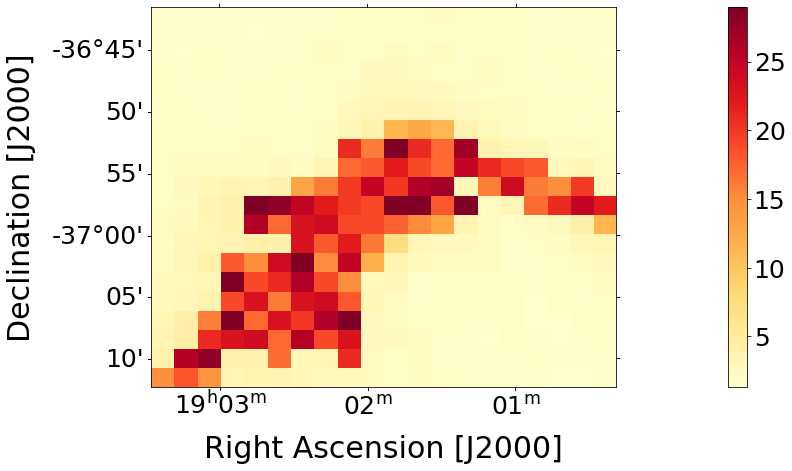

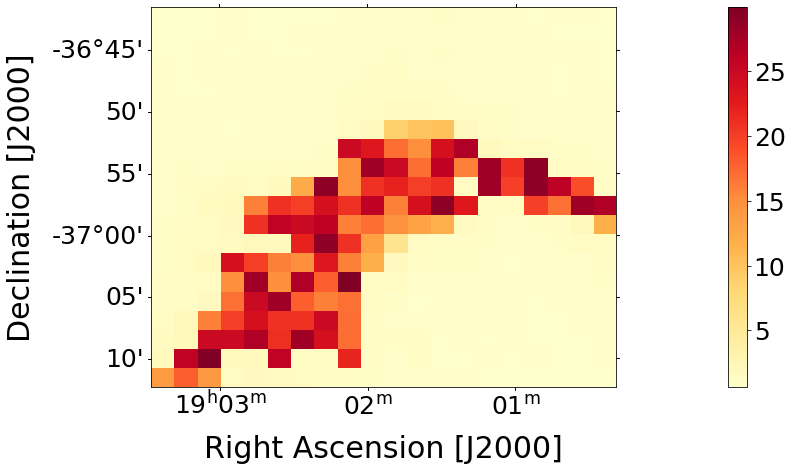

In [4]:
### JUST A SMALL CELL TO PRODUCE A NICE PLOT FOR THE THESIS ###

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii, fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS

#Opens the .fits file
hdu_i = fits.open('/home/yobd/Documents/i_ext_map.fits')
#Variable for the header of the fits
head_i = hdu_i[0].header

wcs_head_i = WCS(head_i)

#Variable for the image of the fits
im_i = hdu_i[0].data

plt.rc('xtick',labelsize = 25)
plt.rc('ytick',labelsize = 25)
plt.figure(1, figsize = (20, 7))
ax = plt.subplot(projection = wcs_head_i)
c = ax.imshow(im_i, cmap = plt.cm.YlOrRd, label = 'Extinction')
ax.set_xlabel('Right Ascension [J2000]', fontsize = 30)
ax.set_ylabel('Declination [J2000]', fontsize = 30)
plt.colorbar(c, ax = ax, pad = 0.1)
#for cutout in cutouts:
    #cutout.plot_on_original(color = 'white')
plt.show()

#Opens the .fits file
hdu_j = fits.open('/home/yobd/Documents/j_ext_map.fits')
#Variable for the header of the fits
head_j = hdu_j[0].header

wcs_head_j = WCS(head_j)

#Variable for the image of the fits
im_j = hdu_j[0].data

plt.figure(2, figsize = (20, 7))
ax = plt.subplot(projection = wcs_head_j)
c = ax.imshow(im_j, cmap = plt.cm.YlOrRd, label = 'Extinction')
ax.set_xlabel('Right Ascension [J2000]', fontsize = 30)
ax.set_ylabel('Declination [J2000]', fontsize = 30)
plt.colorbar(c, ax = ax, pad = 0.1)
#for cutout in cutouts:
    #cutout.plot_on_original(color = 'white')
plt.show()

In [5]:
### THIS CELL APPLIES THE EXTINCTION VALUES OF EACH GRID CELL TO THE BESANÇON GALAXY MODEL SOURCES FOUND WITHIN THEM ###

from astropy.table import setdiff, Table, vstack

model = ascii.read('/home/yobd/Documents/galaxy_model.dat')

wcoords = np.asarray([model['RAJ2000'], model['DECJ2000']]).T # Transforma lista num array

x_i, y_i = wcs_head_i.all_world2pix(wcoords, 1).T # Função que faz a correcção dos valores

x_i = np.rint(x_i).astype(int)

y_i = np.rint(y_i).astype(int)

model_temp_i = Table.copy(model)

model_temp_i = model_temp_i[x_i < im_i.shape[1]]
y_i = y_i[x_i < im_i.shape[1]]
x_i = x_i[x_i < im_i.shape[1]]

model_temp_i = model_temp_i[y_i < im_i.shape[0]]
x_i = x_i[y_i < im_i.shape[0]]
y_i = y_i[y_i < im_i.shape[0]]

extinctions_i = im_i[y_i, x_i]

extinctions_j = im_j[y_i, x_i]

model_temp_i['I_EXT'] = extinctions_i

model_temp_i['J_EXT'] = extinctions_j

model_temp_2 = setdiff(model, model_temp_i, keys = ['RAJ2000', 'DECJ2000'])

model_temp_2['I_EXT'] = 0

model_temp_2['J_EXT'] = 0

model = vstack([model_temp_i, model_temp_2])

model['I-J_NEW'] = model['I-J'] + model['I_EXT'] - model['J_EXT']

model['I_NEW'] = model['I'] + model['I_EXT']

ascii.write(model, '/home/yobd/Documents/galaxy_model_ext_applied.dat', format = 'csv', overwrite = True)

[1.9984459 1.7746608 1.821969  ... 2.2517614 2.1282275 1.8776354]
[0.9575955 0.8503558 0.8730243 ... 1.0789658 1.0200058 0.8996979]
